# Social Network Analysis
### A Framework for Unlocking and Linking WWII Japanese American Incarceration Biographical Data
### Creator: Emily Ping O'Brien

In this notebook, we examine relationships and events at Tule Lake using social network analysis. Social network analysis studies “the behavior of the individual at the micro level, the pattern of relationships (network structure) at the macro level, and the interactions between the two. Social networks are both the cause of and result of individual behavior” [1].

For this case study, social network analysis involves extracting data from WRA records and applying graph algorithms found within networking tools. NetworkX, an open source Python package used to create and study dynamic structures and functions of complex networks [2], was selected for its ability to integrate graphing and modeling functions directly in Jupyter notebooks. Another open source Python graphing library, Plotly, was explored to analyze the same data and verify findings. 

The approach to leverage both the NetworkX framework and Plotly visualizations in Jupyter notebooks, provides a model for students and researchers to apply to their own archival science research.

#### Creators' Note
The creators of this notebook recognize the records used in this project were created and provided by the US government and therefore do not accurately convey the lives and experiences of the incarcerated Japanese Americans in the WWII US Concentration Camps. We also recognize some information from the federal records might contain personal, sensitive, or damaging information. Our work seeks to respect the privacy of individuals and their families, and approach this time in US history with humility and a willingness to learn.

## Social Network Models using the NetworkX Python library
The first step involves pulling data from the transcribed National Archives "Internal Security Case Reports" Incident Cards. While certain information in the cards was not always consistently provided, what was available was transcribed was entered into the Incident Card dataset we are using for this notebook. In order to work with the data using Python, we create a dataframe from the imported dataset.

In [69]:
#Import Incident Card dataset and create Python dataframe

#Import python libraries and functions for the Social Network Analysis project
!pip install openpyxl
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px

from IPython.display import display, HTML

# Bokeh functions to create interactive network visualizations
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

#Read the Incident Card csv file into a pandas dataframe
tlincard = pd.read_csv("WRA_incard_2021.csv",dtype=object,na_values=[],keep_default_na=False)

To simply things, we make a few changes to the dataframe. We rename fields and update values in certain fields to all lowercase letters. We also convert the associated values to strings. This helps us compare the data more effectively and avoid issues in the data that was inconsistently recorded (for example: the same individual's name with inconsistent use of capitalization).

In [70]:
#Rename dataframe fields, change all values to lowercase letters, make all values strings
pd.set_option('display.max_colwidth', None)

#Rename columns
tlincard.rename(columns={'NEW-DATE':'nd','CASE#':'case','Other':'other','NEW-OFFENSE':'noffense','OFFENSE':'offense','Image#':'inum', 'NAME':'name','Last Name':'lname', 'First Name':'fname','Other Names (known as)':'oname'}, inplace = True)

#Declare values as strings
tlincard['case'] = tlincard['case'].astype(str)
tlincard['other'] = tlincard['other'].astype(str)
tlincard['noffense'] = tlincard['noffense'].astype(str)
tlincard['offense'] = tlincard['offense'].astype(str)
tlincard['inum'] = tlincard['inum'].astype(str)
tlincard['lname'] = tlincard['lname'].astype(str)
tlincard['fname'] = tlincard['fname'].astype(str)
tlincard['oname'] = tlincard['oname'].astype(str)
tlincard['name'] = tlincard['name'].astype(str)

#Update values to all lowercase letters
tlincard['case'] = tlincard['case'].str.casefold().astype('category')
tlincard['noffense'] = tlincard['noffense'].str.casefold().astype('category')
tlincard['offense'] = tlincard['offense'].str.casefold().astype('category')
tlincard['inum'] = tlincard['inum'].str.casefold().astype('category')
tlincard['lname'] = tlincard['lname'].str.casefold().astype('category')
tlincard['fname'] = tlincard['fname'].str.casefold().astype('category')
tlincard['oname'] = tlincard['oname'].str.casefold().astype('category')
tlincard['name'] = tlincard['name'].str.casefold().astype('category')

#Create copies of the data frame
tlincard_v1 = tlincard.copy()
tlincard_v2 = tlincard.copy()

### Example 1: Incidents involving Incarcerated Individual
To view all incidents involving a particular individual at the Tule Lake Camp, we create a simple graph containing edges and nodes from the dataframe using the NetworkX .from_pandas_edgelist and .draw functions. In this example, we view all reported incidents involving Tetuso Abe during his time at the camp. The center node represents the incarceree, and the outer nodes contain the descriptions of the reported incidents.

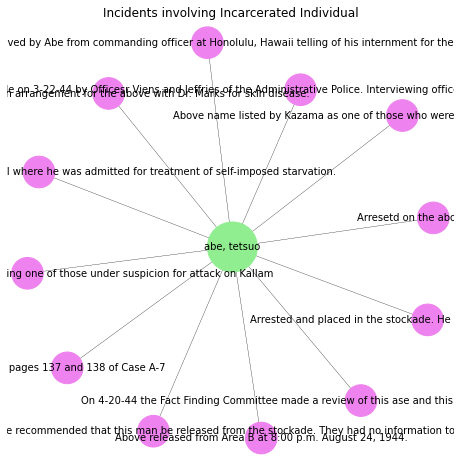

In [71]:
#Slice from dataframe and selecting cards where name of incarcerated individual is Tetsuo Abe
model1 = tlincard_v1.loc[(tlincard_v1["name"]=='abe, tetsuo')]
model1 = networkx.from_pandas_edgelist(model1,'name','other')

#Plot simple graph of all of the incident descriptions that Tetsuo Abe was accused of
plt.figure(figsize=(8,8))

#Differentiate node colors and sizes based on whether the value of the node is equal to "abe, tetsuo"
color_map = []
node_sizes=[]

for node in model1:
    if node == "abe, tetsuo":
        color_map.append('lightgreen')
        node_sizes.append(2500)
    else:
        color_map.append('violet')
        node_sizes.append(1000)
        
#Add axes functions to display title
ax = plt.gca()
ax.set_title('Incidents involving Incarcerated Individual')

#Draw nodes and edges, indicate font size
networkx.draw(model1, with_labels=True, node_color=color_map, node_size=node_sizes, width=.3, font_size=10, ax=ax)
_ = ax.axis('off')

### Interactive Visualization using Bokeh
The same graph can be interactive by calling the Bokeh Library. Hovering over each node will display the labels.

In [72]:
# Function to display Bokeh interactive visualizations
output_notebook()

#Slice from dataframe and selecting cards where name of incarcerated individual is Tetsuo Abe
model1 = tlincard_v1.loc[(tlincard_v1["name"]=='abe, tetsuo')]
model1 = networkx.from_pandas_edgelist(model1,'name','other')

#Title of graph
title = 'Incidents involving Incarcerated Individual'

#Categories that will appear when hovering over each node
HOVER_TOOLTIPS = [("Notes","@index")]

#Create plot - set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS, 
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
              x_range = Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

network_graph = from_networkx(model1, networkx.spring_layout, scale=10, center=(0, 0))
network_graph.node_renderer.glyph = Circle(size=15, fill_color='violet')
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)

Loading BokehJS ...

### Example #2: Individuals Involved in 11/4/43 "Riot"

In the next example, we focus on the date November 4th, 1943, when a large congregation of incarcerated Japanese Americans at Tule Lake was deemed a “riot” by government officials. On that day, as groups began to gather, the project director of the incarceration camp called in the army and the inmates “were picked up by WRA internal security and savagely beaten before being turned over to the military police and imprisoned in ‘bullpen’ area of the hastily assembled stockade” [3].

<center>Fig. 1</center>
<center><img src="denshonews1.jpg" alt="Newspaper article about protests at Tule Lake Camp in November, 1943 which led to martial law being in place for three months. Article describes camp administration refusing to listen to incarceree demands and violence against staff."></center>
<center>Revolt at Tule Lake: Crop workers blamed for riots; Honolulu Japanese led the mob, 1943-11-04</center>
<center>*Note.* Willard E. Schmidt Papers, Courtesy of San Jose State University Library Special Collections and Archives, photograph, accessed from Densho Digital Repository. [4]</center>
<br>
Almost all of the Incident Cards were given a category for the type of reported incident. To view all cards, and therefore individuals, related to the "riot" event we locate rows in the dataframe where the category is equal to "riot". Since we know the date of the event, we also target the records where the date recorded is 11/4/43. From what we know about this incident, we expect the graph to be quite large. Based on this expectation, we can increase the figure size, decrease the size of the nodes, and reduce the font size for the labels.

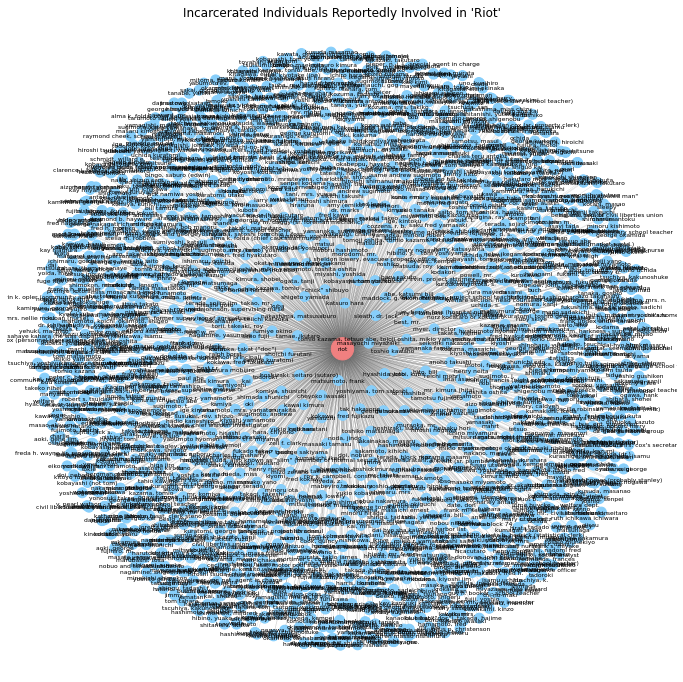

In [73]:
#Use incident card dataset and select cards where name of incarcerated individual is Tetsuo Abe
model2 = tlincard_v1.loc[(tlincard_v1["noffense"]=='riot') & (tlincard_v1["nd"]=='43-11-04')]
model2 = networkx.from_pandas_edgelist(model2,'noffense','name')

#Plot simple graph of all of the incident descriptions that Tetsuo Abe was accused of
plt.figure(figsize=(12,12))

#Differentiate node colors and sizes based on whether the value of the node is "riot"
color_map = []
node_sizes=[]

for node in model2:
    if node == "riot":
        color_map.append('lightcoral')
        node_sizes.append(500)
    else:
        color_map.append('lightskyblue')
        node_sizes.append(100)

#Add axes functions to display title
ax = plt.gca()
ax.set_title("Incarcerated Individuals Reportedly Involved in 'Riot'")

#Draw nodes and edges, indicate font and edge color
networkx.draw(model2, with_labels=True, node_color=color_map, node_size=node_sizes, edge_color = 'dimgrey', width=.1, font_size=6, ax=ax)
_ = ax.axis('off')

As predicted, the graph is very large and contains thousands of nodes. While this is not a particularly legible diagram, it does give users an idea of the vast number of people who were recorded to be involved in the "riot" by the police and government officials.

### Example #3: Reported Incidents Surrounding the "Riot" (between October 30 - November 9, 1943)

Using the same dataset, we create a new dataframe where the Incident Cards were recorded starting October 30, 1943 and up to the date November 9, 1943. This would show us reported incidents 5 days before and after the "riot" event. Any card recorded without a date will not appear in this dataframe. Additionally, we remove any incident cards where a title or category of the type of offense was not recorded.

In [74]:
#Use copy of dataframe to select records where incident card date is 5 days before riot on 11/4/43 and 5 days after (drop all other rows)
tlincard_v2.drop(tlincard_v2[(tlincard_v2['nd'] <= '43-10-30')].index, inplace = True)
tlincard_v2.drop(tlincard_v2[(tlincard_v2['nd'] >= '43-11-09')].index, inplace = True)
#Drop any records where the description of the incident is not provided
tlincard_v2.drop(tlincard_v2[(tlincard_v2['noffense'] == "")].index, inplace = True)

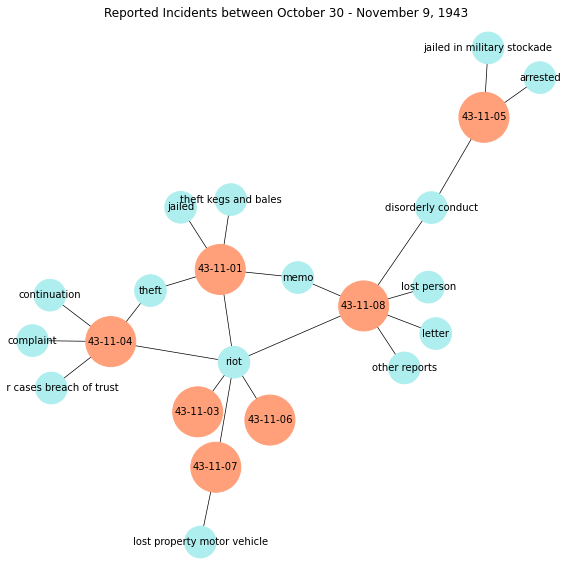

In [75]:
#Create Social Network Model of all incidents reported 5 days before and after the "riot" event on 11/4/43
model3 = tlincard_v2.loc[(tlincard_v2["name"] != None)]

#View model by date and offense type
m3 = networkx.from_pandas_edgelist(model3,'nd','noffense')

#Provide figure size
plt.figure(figsize=(10,10))

#Differentiate node colors and sizes based on whether the value of the node is a numerical value
color_map = []
node_sizes=[]

def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

for node in m3:
    if has_numbers(node):
        color_map.append('lightsalmon')
        node_sizes.append(2500)
    else:
        color_map.append('paleturquoise')
        node_sizes.append(1000)

#Add axes functions to display title
ax = plt.gca()
ax.set_title("Reported Incidents between October 30 - November 9, 1943")

#Draw nodes and edges, indicate font and edge color
networkx.draw(m3, with_labels=True, node_color=color_map, node_size=node_sizes, width=.7, font_size=10, ax=ax)
_ = ax.axis('off')

Investigating a date node on November 1, 1943 reveals reported incidents of “theft.” Returning to the Python dataframe and setting conditions for incidents of “theft” occurring on November 1st, our results show nine incarcerees who were reported for picking vegetables together in a western farm area away from their regular location of employment. Based on the descriptions, it is likely that all of the individuals were caught participating in the same act together.

In [76]:
#Use same dataframe and select cards where category of incident is "theft" and date is 11/1/43
theft = tlincard_v2.loc[(tlincard_v2["noffense"] == "theft") & (tlincard_v2["nd"] == "43-11-01")]
theft[['nd','noffense','other']]

,nd,noffense,other
737,43-11-01,theft,Found picking vegetables for individual use in western farm area. Also away from regular place of employment during working hours.
4172,43-11-01,theft,Found picking vegetables for individual use in western farm area. Also away from regular place of employment during working hours.
5050,43-11-01,theft,Found picking vegetables for individual use in western farm area. Also away from regular place of employment during working hours.
12965,43-11-01,theft,Found picking vegetables for individual use in western farm area. Also away from regular place of employment during working hours.
13349,43-11-01,theft,Found picking vegtables for individual use in western farm area. Also away from regular place of employment during workig hours.
13411,43-11-01,theft,Found picking vegetables for individual use in western farm area. Also away from regular place of employment during working hours.
13944,43-11-01,theft,Found picking vegetabls for individual use in western farm areas. Also away from regular place of employment during working hours.
14090,43-11-01,theft,Found picking vegetables for individual use in western far area. Also away from regular place of employment during working hours.
15338,43-11-01,theft,Found picking vegetables for individual use in western farm area. Also away from regular place of employment during working hours.


<center>Fig. 2</center>
<center>Evacuee farmers filling sacks with newly dug potatoes at this relocation center</center>
<center><img src="npstl3.jpg" alt="Incarceree farmers filling sacks with newly dug potatoes at the Tule Lake Concentration Camp"></center>
<center>*Note.* This is a photograph of incarcerees working on a farm at the Tule Lake Concentration Center, this picture is not related to the "theft" event.</center>
<center>By Francis Leroy Stewart, photograph, accessed from National Park Service website, U.S. Department of the Interior. [5]</center>
<br>
Another date node for November 4, 1943 shows reports of incidents designated “other cases breach of trust.” Results from the Python dataframe based on these conditions display data for 15 cards for individuals who failed to return tools taken from the construction department at some point before November 4th. While it is not clear if taking the tools was an organized event by some of the incarcerated Japanese Americans, we can observe that these incidents were recorded on the same day as the "riot". A question that might be answered by reading the coinciding incident report is why the officials chose to recover the items on the day of November 4th. Did it occur before or after the reported "riot" incident? And what were the reported intentions of the incarcerees for taking the tools

In [77]:
#Use same dataframe and select cards where category of incident is "other cases breach of trust" and date is 11/4/43
pd.set_option('display.max_colwidth',180)
trust = tlincard_v2.loc[(tlincard_v2["noffense"] == "other cases breach of trust") & (tlincard_v2["nd"] == "43-11-04")]
trust[['nd','noffense','other']]

,nd,noffense,other
1285,43-11-04,other cases breach of trust,"Evacuees failed to return tools to construction Dept. from which they were taken before 11-4-43, although requested to do so."
1716,43-11-04,other cases breach of trust,7-1-44 Memo to the avoe attaching report regarding the recovery of carpenter tools which have been in the possession of evacuees since 11-4-43.
1717,43-11-04,other cases breach of trust,6-21-44 memo from the above with list of former constr. Workers who have failed to return tools loaned to them.
6289,43-11-04,other cases breach of trust,Failed to return tools taken from Constr. Dept. although requested to do so. List of articles recoverd by Police Dept.
8722,43-11-04,other cases breach of trust,Failed to return tools taken from construction Department. List of articles recovered by Police Dept.
9745,43-11-04,other cases breach of trust,Failed to return tools taken from Constr. Dept. although requested to do so. List of articles recovered by Police Dept.
10573,43-11-04,other cases breach of trust,Memo 6/28/44 authorizing Adm. Police Dept. to search apts. of listed names of evacuees to recover things taken from Contr. Dept.
10897,43-11-04,other cases breach of trust,Failed to return tools taken from constr. dept. although requested to do so. List of articles recovered by the Police Dept.
11869,43-11-04,other cases breach of trust,Failed to return tools taken from constr. dept. although requested to do so. List of articles recovered by Police Dept.
12586,43-11-04,other cases breach of trust,Failed to return tools taken from Constr. Dept. although requested to do so. List of articles recovered by Police Dept.


<center>Fig. 3</center>
<center>Cabinet worker's saw is expertly used by Jime Kabayashi, 62, on the interior construction of general store</center>
<center><img src="npstl5.jpg" alt="Japanese American Incarceree working as cabinet worker, sawing on the interior construction of general store Number 2 at this War Relocation Authority center for evacuees of Japanese descent"></center>
<center>Number 2 at this War Relocation Authority center for evacuees of Japanese descent</center>
<center>*Note.* This is a photograph of an incarceree working construction at the Tule Lake Concentration Camp, this picture is not related to the "other cases breach of trust" event.</center>
<center>By Francis Leroy Stewart, photograph, accessed from National Park Service website, U.S. Department of the Interior. [6]</center>
<br>

In Example 4, we can take another look at the same data to verify the number of incidents that occured based on category and date.

## Models using the Plotly Express Python library

### Example 4: Reported Incidents between October 30 - November 9, 1943 (not including 11/4/43 "Riot")

Using the Plotly Express module from the Plotly Python library, we can create visualizations to help us to see the same data in a different format. In this example, we are still pulling from the Incident Card dataset, but using a refined Incident Card Category Count dataset that only contains the count of each type of reported incident by date. This allows us to see the reported incidents that occured 5 days before and after the "riot" and the number of each type of reported incident each day.  The visualization for this example is in the form of a bar chart that was created using the Plotly function .bar.

Note: In order to get a better view of the other events, we chose not to include the cards reported as a "riot" by officials (which totalled 3814 cards).

In [78]:
#Read the Incident Card csv file into a pandas dataframe
tlincount = pd.read_excel("incard_category_count.xlsx",dtype=object,na_values=[],keep_default_na=False)
tlincount_v1 = tlincount.copy()
tlincount_v2 = tlincount.copy()
tlincount_v3 = tlincount.copy()

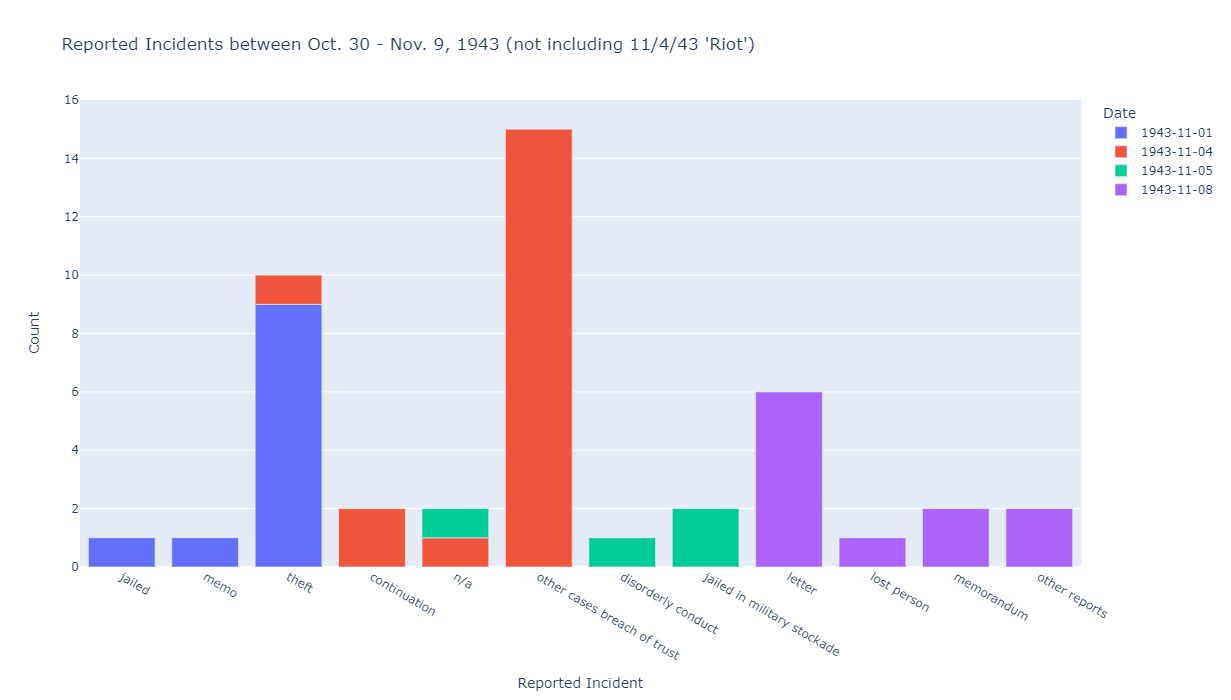

In [79]:
#Create bar chart based on the count of each type of incident 5 days before and after the "riot" event
model4 = tlincount_v1
model4.drop(model4[(model4['Date'] < "1943-10-30")].index, inplace = True)
model4.drop(model4[(model4['Date'] > "1943-11-09")].index, inplace = True)
model4.drop(model4[(model4['Offense'] == "riot")].index, inplace = True)
model4.count()

#Use the Plotly bar chart function, "incident category" for the x axis and "incident count" on the y-axis
fig = px.bar(model4, x="Offense", y="Count",height=700, color="Date",range_y=[0,16],
             hover_data=['Date'],
             labels={
             "Offense":"Reported Incident"
             },
             title = "Reported Incidents between Oct. 30 - Nov. 9, 1943 (not including 11/4/43 'Riot')"
            )
fig.show()

The category for the reported incident is located on the x-axis and the count, or number of cards, is on the y-axis. The date for each incident is distinguished by different colors identified in the legend or by hovering over each colored portion in the bar. From this example, we can confirm there were 9 incidents of “theft” on November 1, 1943 and 15 incidents of “other cases breach of trust” on November 4, 1943.

Through examination of these results, we can confirm our findings from Example 3. We can also conclude that the “thefts,” “other cases breach of trust,” and other events were clear displays of the rising discontent in the camp regarding access to food and supplies. Further research into these acts of resistance might shed light on how and why the “riot” event unfolded at Tule Lake. It also leads to questions regarding the informal gathering of the accused incarcerees and additional or other intentions they may have had beyond what was reported in the cards. 

### Example 5: All Reported Incidents by Year

To compare all of the reported incidents at Tule Lake, we create an animated figure using Plotly Express. We continue to use the Incident Card Category Count dataset to show all reported incidents, but now we display the incidents by year using a slider.

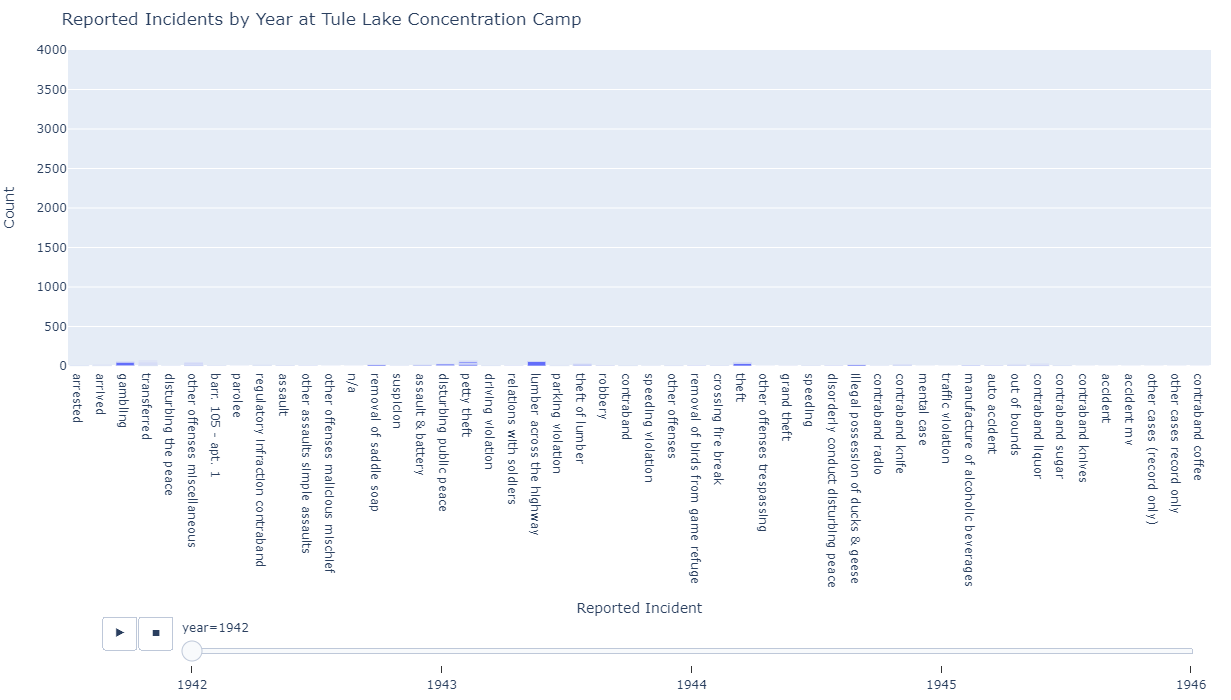

In [80]:
#Create Plotly Express animated bar chart based on count of all incidents reported at Tule Lake Concentration Camp by year
model5 = tlincount_v2

#Use the Plotly bar chart function, "incident category" for the x axis and "incident count" on the y-axis
#Do not display the days in the bars with different colors
fig = px.bar(model5, x="Offense", y="Count", animation_frame="year",height=700, range_y=[0,4000],
             hover_data=['Date'],
             labels={
             "Offense":"Reported Incident"
             },
             title = "Reported Incidents by Year at Tule Lake Concentration Camp"
            )
#Add padding between chart and slider/menu buttons 
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=200)
)
fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 250)
fig['layout']['sliders'][0]['pad']=dict(r= 10, t= 250,)

fig.show()

The 'Reported Incidents by Year' barchart proves difficult to read due to the large number of incidents reported during the riot. If one hovers over the bar for the 'riot' category, you can see 3814 incidents of 'riot' were reported on 11/4/43. The number of incidents for this event far exceeds the average of number of incidents reported daily at Tule Lake. If we remove the 'riot' incident to view all other reported incidents, we create a bar chart that is easier to read and understand.

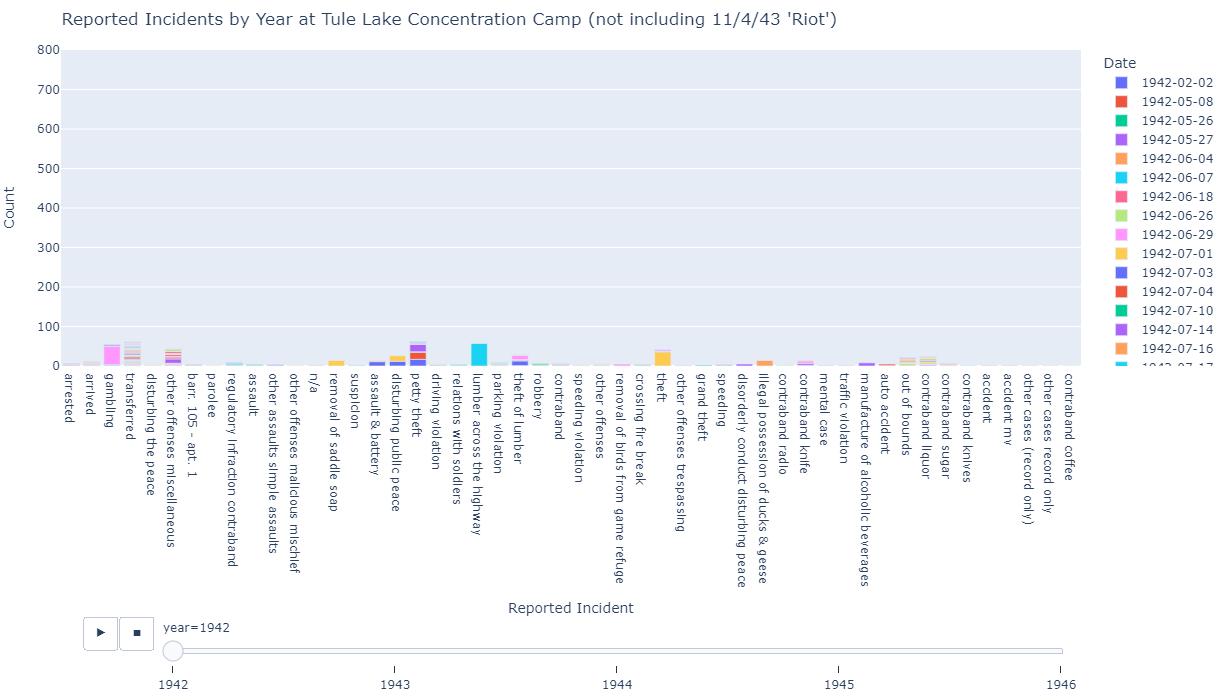

In [81]:
#Create Plotly Express animated bar chart based on count of all incidents reported at Tule Lake Concentration Camp by year, remove all incident cards from 11/4/43 riot
model6 = tlincount_v2
model6.drop(model6[(model6['Offense'] == "riot") & (model6['Date'] == "1943-11-04")].index, inplace = True)

#Create bar chart based on count of incidents per year (label shows number of reported events per day)
fig = px.bar(model6, x="Offense", y="Count", color = "Date", animation_frame="year", height=700, range_y=[0,800],
             hover_data=['Date'],
             labels={
             "Offense":"Reported Incident"
             },
             title = "Reported Incidents by Year at Tule Lake Concentration Camp (not including 11/4/43 'Riot')"
            )
#add padding between chart and slider/menu buttons 
fig.update_layout(margin=dict(l=20, r=20, t=50, b=200))
fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 250)
fig['layout']['sliders'][0]['pad']=dict(r= 10, t= 250)
fig.show()

## Conclusion

By examining the Incident Card dataset using Python and Plotly, and incorporating NetworkX functions to create social network models, we can easily view different interactions between individuals over time and how they relate to various events (as reported by government officials). More specifically, graphing dates and incidents around the November 4, 1943 “riot” event offers an alternate view into the life and treatment of incarcerated Japanese Americans. 

The approach to use social network analysis with archival data allows us to delve deeper into recorded events. Our intention is to  create a model for other narratives of "serial forced displacement" in America, ultimately presenting new and additional opportunities for analysis and research.

### References

[1] Stokman, F.N. (2001). Networks: Social. *International Encyclopedia of the Social & Behavioral Sciences*, 10509-10514. https://doi.org/10.1016/B0-08-043076-7/01934-3

[2] NetworkX. (2021). *Network Analysis in Python*. NetworkX, 2021. https://networkx.org/

[3] Takei, B. (2020). Tule Lake. *Densho Encyclopedia*. Densho. https://encyclopedia.densho.org/Tule_Lake/

[4] *Revolt at Tule Lake: Crop workers blamed for riots; Honolulu Japanese led the mob, 1943-11-04 (1943, November 4th)* [Photograph]. (1943). Densho Digital Repository. https://ddr.densho.org/ddr-csujad-2-41/

[5] Stewart, F.L. (n.d.). *Evacuee farmers filling sacks with newly dug potatoes at this relocation center.* National Park Service, U.S. Department of the Interior, United States. https://www.nps.gov/media/photo/gallery-item.htm?pg=278254&id=6751d7fe-71e7-457b-9082-40d51e290bab&gid=7ECC88C0-C964-4161-960C-515F7037F040

[6] Stewart, F.L. (n.d.). *Cabinet worker's saw is expertly used by Jime Kabayashi, 62, on the interior construction of general store Number 2 at this War Relocation Authority center for evacuees of Japanese descent.* National Park Service, U.S. Department of the Interior, United States. https://www.nps.gov/media/photo/gallery-item.htm?pg=278254&id=d08ece9e-4090-47d1-bd50-e5fad109a57f&gid=041492ED-45F7-47D7-A82C-8908E7995B46